## Load graphs, bulk matrices and remove dummy nodes, rows cols.

In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio
import tools.graph_processing as gp
import pickle

In [2]:
path_realdata = '../data/Oasis_original_new_with_dummy/'
path_nondummy = '../data/Oasis_original_new_renamed/modified_graphs/'

In [3]:
X_mALS_dummy = sio.loadmat(path_realdata +'/X_mALS.mat')['X']

In [4]:
def remove_dummy_rowcol_X(bulk_X, graphs):
    
    dummy_mask = [list(nx.get_node_attributes(graph,'is_dummy').values()) for graph in graphs]
    dummy_mask = sum(dummy_mask,[])
    dummy_indexes = [i for i in range(len(dummy_mask)) if dummy_mask[i]==True]     
    
    bulk_X = np.delete(bulk_X,dummy_indexes,0) # delete the dummy rows
    bulk_X = np.delete(bulk_X,dummy_indexes,1) # delete the dummy columns
    
    return bulk_X

In [5]:
all_graphs = gp.load_graphs_in_list(path_realdata + '/labelled_graphs')

#load non dummy graphs
all_graphs_non_dummy = gp.load_graphs_in_list(path_nondummy)
sizes = [len(g) for g in all_graphs_non_dummy]

In [6]:
X_mALS = remove_dummy_rowcol_X(X_mALS_dummy,all_graphs)

## Retrieve matched nodes and depth values using the largest graph as reference.

In [7]:
all_graphs[0].nodes.data()[0]

{'vertex_index': 1357,
 'sphere_3dcoords': array([  6.50138903, -93.98175049, -33.54344177]),
 'sphere_coords': [-1.5017292499542236, 1.9128626585006714],
 'basin_label': 307.0,
 'basin_area': 447.01047,
 'depth': -0.18439683,
 'basin_thickness': 2.5869646072387695,
 'ico100_7_vertex_index': 7574,
 'label_neuroimage': 28,
 'label_media': 90,
 'sphere_3dcoords_noreg': array([ 17.402021, -91.770744, -35.71135 ], dtype=float32),
 'ico100_7_vertex_index_noreg': 11492,
 'is_dummy': False,
 'labelling_kerGM': 0.6726961301647116,
 'labelling_mALS': 0.6726961301647116,
 'labelling_mSync': 0.6726961301647116,
 'labelling_CAO': 0.2269832262372122}

In [8]:
r_perm=pickle.load(open("../data/r_perm_22.gpickle","rb"))

In [9]:
import tools.graph_visu as gv

Number of labels: 101


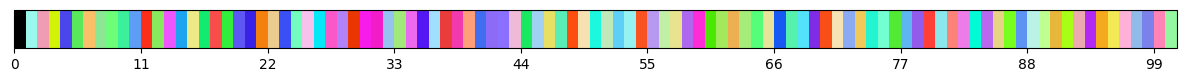

In [11]:
cmap = gv.rand_cmap(101, type='bright', first_color_black=True, last_color_black=False, verbose=True)